In [1]:
# Top level imports
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt
import numpy as np

# Classification Metrics

Here, I'm running through various different classification metrics, and using scikit learn's `metrics` modules equivalents as a benchmark to make sure mine are running as expected.

First, I'll load MNIST as a default classification problem, and use a `SGDClassifier` to get some baseline scores, then compare my home coded metrics against scikit learn's.

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
# making it a binary classification problem if required
y_train_2 = (y_train == '2')
y_test_2 = (y_test == '2')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_2)

SGDClassifier()

In [ ]:
y_pred_2 = sgd_clf.predict(X_test)

## Accuracy

Accuracy is defined as the amount of correct predictions divided by thet total amount of predictions made. Below I check `scikit learn`'s version of this against my own to see how my implementation performs.



In [ ]:
# sklearn
from sklearn.metrics import accuracy_score

accuracy_score(y_test_2, y_pred_2)

0.9729

In [ ]:
# my version
from machine_learning.metrics import accuracy

accuracy(y_test_2, y_pred_2)

0.9729

It works, which is good. Accuracy is considered to be quite a flawed metric in evaluating classifiers. This is because it handles datasets where the target variable isn't evenly distributed poorly. Imagine a dataset with 99% of the samples having a target of `0` and 1% having `1`. You can make a 99% accurate classifier by predicting `0` for every single instance. A practical example of this is shown below:

In [ ]:
# check balance of whole dataset classes
print(f'Train set = {y_train_2.sum()/len(y_train_2)}')
print(f'Test set = {y_test_2.sum()/len(y_test_2)}')

Train set = 0.0993
Test set = 0.1032


In [ ]:
# create an array of always false predictions
y_pred_never_2 = np.zeros(len(y_test_2), dtype=bool)

In [ ]:
# evaluate this with our accuracy metrics
accuracy(y_test_2, y_pred_never_2)

0.8968

As shown, you can score high accuracy with poor classifiers, so more nuanced metrics should be used for proper evaluation of a classifier.

## Precision

The precision of a classifier is defined as the amount of true positives divided by the sum of true positives and false positives. This can be thought of as the accuracy of the classifier's positive predictions



In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test_2, y_pred_2)

0.866923818707811

In [ ]:
from machine_learning.metrics import precision

precision(y_test_2, y_pred_2)

0.866923818707811

So the implemention of precision looks like it's working.

## Recall

Recall is defined as the number of true positives divided by the sum of true positives and false negatives. In other words, it's the ratio of positive instances that are correctly identified by the classifier.

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test_2, y_pred_2)

0.8711240310077519

In [ ]:
from machine_learning.metrics import recall

recall(y_test_2, y_pred_2)

0.8711240310077519

This implementation looks to be working too.

_todo_ - show a precision recall curve, and why it's hard to balance both.

## F1 Score

F1 score is the harmonic mean of precision and recall, and takes in both metrics to account. It can score 0 at worst and 1 at best.

In [ ]:
from sklearn.metrics import f1_score as sklearn_f1

sklearn_f1(y_test_2, y_pred_2)

0.8690188496858385

In [ ]:
from machine_learning.metrics import f1_score as personal_f1

personal_f1(y_test_2, y_pred_2)

0.8690188496858385

## Area under the ROC curve

The receiver operating characteristic (ROC) curve is a the area under the chart that is made by plotting the false positive rate (FPR) against the true positive rate (TPR). TPR is the same as recall

In [ ]:
from machine_learning.metrics import plot_roc_curve

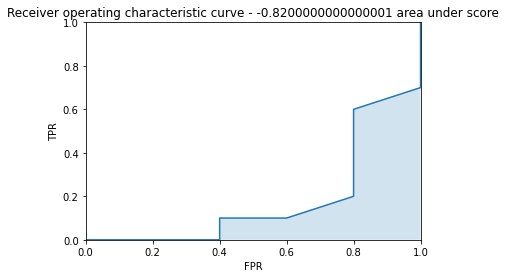

In [ ]:
fig, ax = plt.subplots()

true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

ax = plot_roc_curve(true, pred, ax)

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(true, pred)

0.8300000000000001